# Importing Libraries 

In [15]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import requests
import cv2
import json
import numpy as np
import glob
import random
from matplotlib import pyplot as plt

# Loading Models

In [16]:
net = cv2.dnn.readNet("yolov3_custom_last2.weights", "yolov3_custom1.cfg")

# Loading database Json file 
# Classes of Images

In [17]:
f = open("plant_data.json")                         #open the database which is in json format.
d = f.read()
f.close()
t = json.loads(d)
len(t)
classes=["Asthma Plant","Benghal dayflower","Madagascar Periwinkle","Mexican Mint"]

# Main Prediction Code

In [7]:
def predd(patth):
    try:
        img_path = path                                 #path image by user.
        layer_names = net.getLayerNames()
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
        colors = np.random.uniform(0, 255, size=(len(classes), 3))
        #random.shuffle(images_path)
        img = cv2.imread(img_path)
        img = cv2.resize(img, None, fx=0.4, fy=0.4)
        height, width, channels = img.shape
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)
        class_ids = []
        confidences = []
        boxes = []
        for out in outs:                                       #comparison between the images and the yolo_custom model.
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.3:
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)
                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        font = cv2.FONT_HERSHEY_PLAIN
        pred=[]
        for i in range(len(boxes)):                          #creating box around the prediction image
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                pred.append(label)
                color = colors[class_ids[i]]
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

        cv2.imshow("Image", img)                             #showing the image which is uploaded by the sure
        key = cv2.waitKey(0)
        cv2.destroyAllWindows()
        imgage = cv2.imread(path)
        RGB = cv2.cvtColor(imgage, cv2.COLOR_BGR2RGB)
        d=[]
        for i in t:                                          #comparing the name between the name predicted and the name 
            for m in pred:                                   # which is present in the dataset.
                if m == i["name"]:
                    for l in i.items():
                        k=list(l)
                        d.append(k)
                        if "name" == l[0]:
                            print('Predication Name: '+l[1])
                        if 'hindi' == l[0]:
                            print('Hindi name: '+l[1])
                        if 'common'==l[0]:
                            print('Common Names: '+l[1])
                        if 'use' == l[0]:
                            print('Uses: '+l[1])
                        if 'info' == l[0]:
                            print('Information of plant: '+l[1])
                        if 'original' == l[0]:
                            print('Name of plant: ' + l[1] )
                        if 'scifi' == l[0]:
                            print('Scientific Name: ' + l[1])
                        
        s=d[5]                                                #sorting the plant information link from database and displaying
        s.remove('link')                                      #for user to see the more information.
        for a in s:
            print(a)
        plt.imshow(RGB)
        plt.title('Leaf Image')
        plt.show()
    except:                                            #if the image not present in database, then message pops saying this. 
        print("Oops!!! No such ayurvedic plant is found. It can be any wrong image like false plant or any other object.")
    return a


# Output of Prediction 
# Identification of Plant and related Details 

Predication Name: Benghal dayflower
Name of plant: Tropical Spiderwort
Common Names: Benghal dayflower, Tropical Spiderwort, or Wandering Jew, Kanshira in Bengali
Hindi name: Kana
Scientific Name: Commelina benghalensis
Uses: Leprosy, Sore throat, opthalmia, burns, pain and infammation and also used as de pressant, demulcent, emollient and laxative.
Information of plant:  is a perennial herb native to tropical Asia and Africa. It has been widely introduced to areas outside its native range, including to the neotropics, Hawaii, the West Indies and to both coasts of North America. It has a long flowering period, from spring to fall in subtropical areas, and throughout the year closer to the equator.[7][8] It is often associated with disturbed soils.
https://en.wikipedia.org/wiki/Commelina_benghalensis


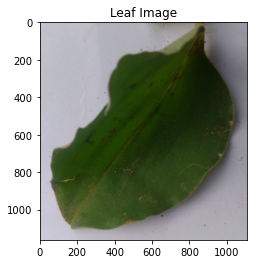

In [18]:
path=r'D:/Projects/LBS/try/gg/005_6.jpg'                      #image path and function.
e=predd(path)                                             

# Redirection to relevant website

In [19]:
driver = webdriver.Chrome(ChromeDriverManager().install())                     #link open for user.
url=e
driver.get(url)

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 98.0.4758
[WDM] - Get LATEST driver version for 98.0.4758
[WDM] - Driver [C:\Users\vrush\.wdm\drivers\chromedriver\win32\98.0.4758.102\chromedriver.exe] found in cache


# plant data

In [13]:
#entire dataset of plant.
t=[{'name':"Asthma Plant",
    'original':'Euphorbia Hirta',
    'common':'Asthma Plant,Dove Milk,Garden Spurge,Hairy Spurge,Pillpod Sandmat,Pillpod Spurge,Red Euphorbia,Snakeweed,Sneezeweed,Sneeze Weed,Spurge',
    'hindi':'Bara Dudhi',
    'scifi':'Euphorbia Hirta',
    'link':'https://plants.ces.ncsu.edu/plants/euphorbia-hirta/',
    'use':'traditionally for female disorders, respiratory ailments (cough, coryza, bronchitis, and asthma), worm infestations in children, dysentery, jaundice, pimples, gonorrhea, digestive problems, and tumors',
    'info':'Spurges are annual weeds that flourish in warm weather, but in warmer climates, they can persist into late fall. Plants produce greenish-white flowers in summer through early fall, then die after frost. Spurges are some of the most common warm-season weeds in container nurseries. Also commonly known as Dove Milk, Euphorbia hirta exudes a milky sap when stems or leaves are broken.'},
  {'name':"Benghal dayflower",
   'original':'Tropical Spiderwort',
   'common':'Benghal dayflower, Tropical Spiderwort, or Wandering Jew, Kanshira in Bengali',
   'hindi':'Kana',
   'scifi':'Commelina benghalensis',
   'link':'https://en.wikipedia.org/wiki/Commelina_benghalensis',
   'use':'Leprosy, Sore throat, opthalmia, burns, pain and infammation and also used as de pressant, demulcent, emollient and laxative.',
   'info':' is a perennial herb native to tropical Asia and Africa. It has been widely introduced to areas outside its native range, including to the neotropics, Hawaii, the West Indies and to both coasts of North America. It has a long flowering period, from spring to fall in subtropical areas, and throughout the year closer to the equator.[7][8] It is often associated with disturbed soils.'},
  {'name':"Madagascar Periwinkle",
   'original':'Pink Periwinkle',
   'common':'bright eyes, Cape periwinkle, graveyard plant, Madagascar periwinkle, old maid, pink periwinkle, rose periwinkle',
   'hindi':'Sadabahar,Sadaphuli,Sadasuhagi',
   'scifi':'Catharanthus Roseus',
   'link':'https://en.wikipedia.org/wiki/Catharanthus_roseus',
   'use':'Relieving muscle pain, Depression of the central nervous system, applying to wasp stings and to heal wounds,treatment of stomach ache',
   'info':'C. roseus has been widely commercialized as an ornamental plant. Endangered in the wild, it is a fast-growing plant that is easy to cultivate. It is grown in gardens and parks worldwide and it has escaped from cultivation and naturalized near houses, in disturbed sites, and in natural habitats in seasonal dry and humid habitats. The species produces numerous small seeds that can be easily dispersed by ants, wind and water, but it can be also propagated vegetatively by cuttings (Sutarno and Rudjiman, 1999). C. roseus is listed as invasive in numerous countries in Asia, Africa, the Americas and Oceania.'},
  {'name':"Mexican Mint",
   'original':'Indian Mint',
   'common':'Bush Mint,Spearmint',
   'hindi':'Ajwain/Patharchur',
   'scifi':'Coleus Amboinicus',
   'link':'https://www.organicfacts.net/health-benefits/herbs-and-spices/indian-borage-mexican-mint.html',
   'use':'fever, cough, cold, asthma, migraines, and skin problems.',
   'info':'If you happen to stumble across a small green perennial plant in Africa that smells like Cuban oregano, there’s a good chance you’ve found Indian borage, which is also known by other names, such as Mexican Mint, Spanish thyme, country borage, and others. Although it is native to parts of southern and eastern Africa, the demand for this beneficial herb has caused cultivation to spread to other tropical areas around the world with suitable growing conditions. The plant, whose scientific name is Plectranthus amboinicus, is very hardy and grows quickly, requires little water, and can even grow in colder conditions if the weather changes dramatically.'}]

# Update the json

In [20]:
f = open('plant_data.json', 'w')                           #after updating, saving dataset. 
f.write(json.dumps(t))
f.close()